In [59]:
from os.path import join

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np

In [60]:
fig_width = 6
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [61]:
output_dir = join('..', 'plots', 'stream_exp')

In [107]:
model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'Weak Summary',
                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+I'], ordered=True)

metric_dtype = pd.api.types.CategoricalDtype(categories=['triples', 'primary vertices'], ordered=True)

In [108]:
metric_dtype.categories[0]

'triples'

In [109]:
def plot_bars(df, dataset):
    for bisimK in range(3):
        kf = df[df['k'] == bisimK].copy()
        kf['model'] = kf['model'].astype(model_dtype)
        kf['metric'] = kf['metric'].astype(metric_dtype)
        ddf = kf.set_index(['model', 'metric'])['relative']


        pdf = ddf.unstack()
        #print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)

    #    if bisimK != 0:
    #        plt.rcParams['figure.figsize'] = [fig_width,4]
    #    else:
    #        plt.rcParams['figure.figsize'] = [fig_width,5.5]

        ax = pdf.plot(kind='bar', color=['lightblue', 'firebrick'], width=.75, rot=45)
        ax.set_ylim([0,100])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_ylabel("% of data graph")
        ax.set_xlabel("")
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=3)

    #    if bisimK != 0:
    #        ax.get_legend().remove()

        plt.title(dataset + ' dataset, k=%s' % bisimK)
        plt.tight_layout()
        plt.grid()
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-compression_summarization.pdf', bbox_inches='tight', format='pdf', dpi=300)
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-compression_summarization.png', bbox_inches='tight', format='png', dpi=300)

In [110]:
# TimBL11M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.7, 6.5), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 9.6, 1.4), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 1.6, 14.6), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 37.2, 5.5), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 1.9, 17.9), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 74, 0.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 1.1, 9.9), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 50, 0.1), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 7.6, 69.2), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 139.0, 20.6), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 7.6, 69.2), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 139.0, 20.6), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 0.8, 6.9), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 12.0, 1.8), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 1.4, 12.5), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 27.7, 4.1), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 0.7, 6.5), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 10.8, 1.6), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 1.8, 16.0), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 37.3, 5.5), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 0.4, 3.8), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 3.1, 0.5), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 0.8, 7.1), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 11.3, 1.7), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 1.8, 15.9), ignore_index=True)


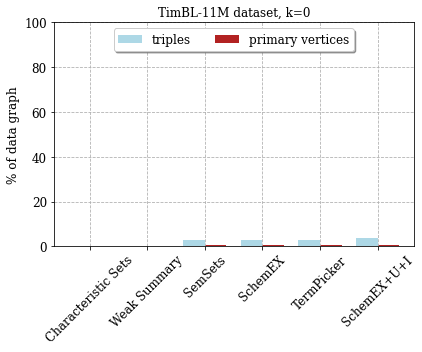

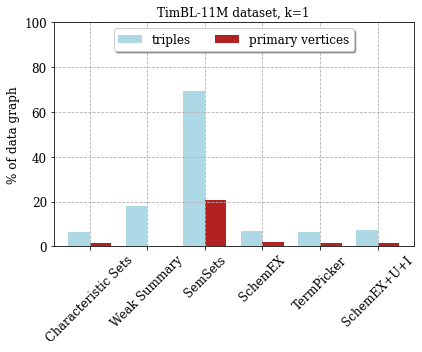

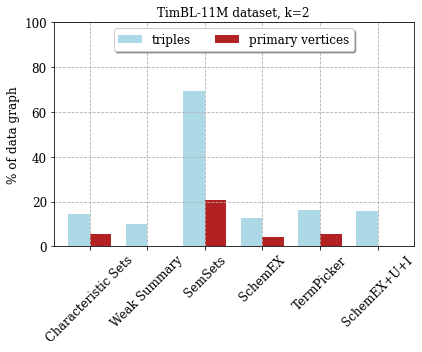

In [111]:
plot_bars(df, 'TimBL-11M')

In [112]:
# DyLDO-127M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.6, 0.5), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 23.0, 0.3), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 2.1, 1.7), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 112.8, 1.6), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 14.8, 9.0), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 394, 0.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 25.1, 19.7), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 102, 0.1), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 45.3, 35.6), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 1733.5, 25.0), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 45.3, 35.6), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 1733.5, 25.0), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 15.7, 12.3), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 254.5, 3.6), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 19.8, 15.6), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 431.1, 6.1), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 11.1, 8.7), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 238.4, 3.4), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 25.4, 19.9), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 559.1, 7.9), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 8.5, 6.7), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 53.0, 0.8), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 19.9, 15.7), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 249.5, 3.5), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 22.9, 18), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[1], 466.9, 6.6), ignore_index=True)



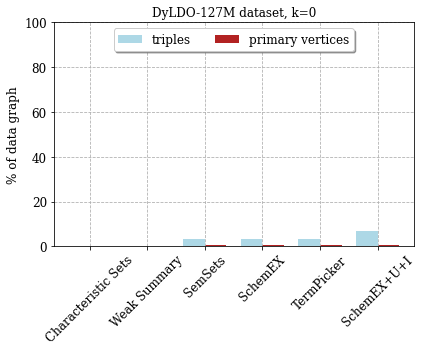

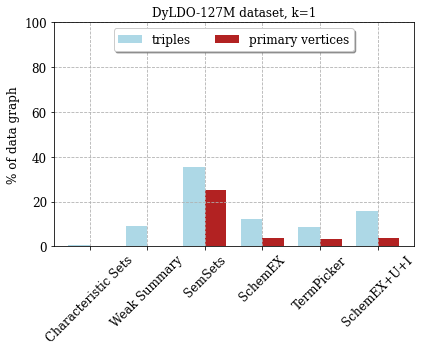

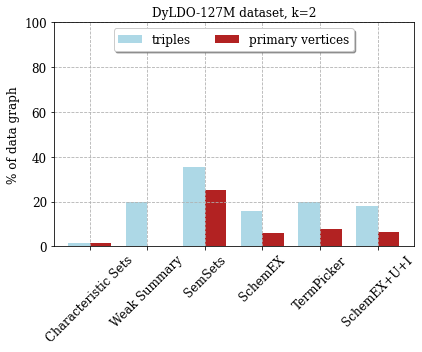

In [113]:
plot_bars(df, 'DyLDO-127M')